# CS6475: Image Frequency Spectra
---
This notebook follows the lectures in Module 4 dealing with frequency domain transforms of images. In many cases (as in the Blending project) there are clear analogues between operations in the frequency and spatial domains, but operating in the frequency domain also affords some unique opportunities. The walkthrough portion illustrates some practical issues that arise out of convention or implementation choices in the Numpy fft module, then proceeds to produce frequency spectra from images. 

You should complete Parts 1-3 by reading through the notebook and executing each code cell (you can use the keyboard shortcut `shift + enter` to execute cells). The last last section of the notebook contains a series of challenge problems that ask you to apply & extend these concepts. There are no required deliverables for this exercise, but you are encouraged to complete & discuss the material & challenge problems on the course forum. This material may appear on the final exam.

## Lesson Summary
---
  - [Part 1 - Fourier Transform Basics](#Part-1:-Fourier-Transform-Basics) -- demonstrate the basics of Fourier transforms
  - [Part 2 - Real Image Spectra](#Part-2:-Real-Image-Spectra) -- visualize images as functions
  - [Part 3 - Challenges](#Part-3:-Challenges) -- apply what you've learned


In [1]:
%matplotlib inline

In [2]:
import cv2

import numpy as np
import numpy.fft as fft
import matplotlib as mpl

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

mpl.rcParams['image.cmap'] = "gray"  # show images as grayscale by default

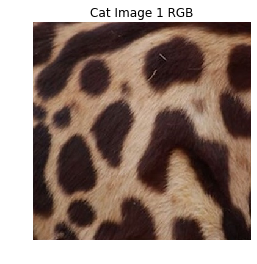

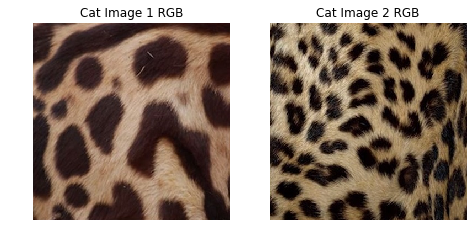

In [3]:
cat_image_1 = cv2.imread("Cat_Image_1.JPG", cv2.IMREAD_COLOR)
cat_image_2 = cv2.imread("Cat_Image_2.JPG", cv2.IMREAD_COLOR)
cat_image_1_RGB = cv2.cvtColor(cat_image_1, cv2.COLOR_BGR2RGB)
cat_image_2_RGB = cv2.cvtColor(cat_image_2, cv2.COLOR_BGR2RGB)
cat_image_1_GRAYSCALE = cv2.cvtColor(cat_image_1, cv2.COLOR_BGR2GRAY)
cat_image_2_GRAYSCALE = cv2.cvtColor(cat_image_2, cv2.COLOR_BGR2GRAY)
plt.imshow(cat_image_1_RGB)
plt.axis("off")
plt.title("Cat Image 1 RGB")
# print("")
# plt.imshow(cat_image_2_RGB)
# plt.axis("off")
# plt.title("Cat Image 2 RGB")
# print("")
plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(cat_image_1_RGB); plt.axis("off"); plt.title("Cat Image 1 RGB");
plt.subplot(132); plt.imshow(cat_image_2_RGB); plt.axis("off"); plt.title("Cat Image 2 RGB");

Cross Fade Section

R2L:  (357, 357)

L2R:  (357, 357)


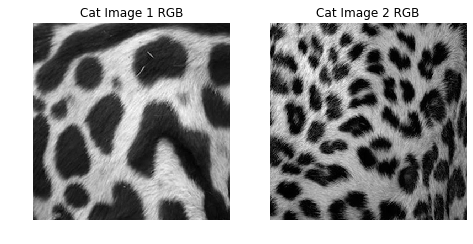

In [4]:
height, width, channel = cat_image_1.shape
right_to_left = np.linspace(0, 1.0, width)
left_to_right = np.linspace(1.0, 0, width)
empty_array = np.ndarray(shape=(height, width), dtype='float')
right_to_left_array = empty_array.copy()
left_to_right_array = empty_array.copy()
right_to_left_array[:,:] = right_to_left
left_to_right_array[:,:] = left_to_right
print("R2L: ", right_to_left_array.shape)
print("")
print("L2R: ", left_to_right_array.shape)
plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(cat_image_1_GRAYSCALE); plt.axis("off"); plt.title("Cat Image 1 RGB");
plt.subplot(132); plt.imshow(cat_image_2_GRAYSCALE); plt.axis("off"); plt.title("Cat Image 2 RGB");

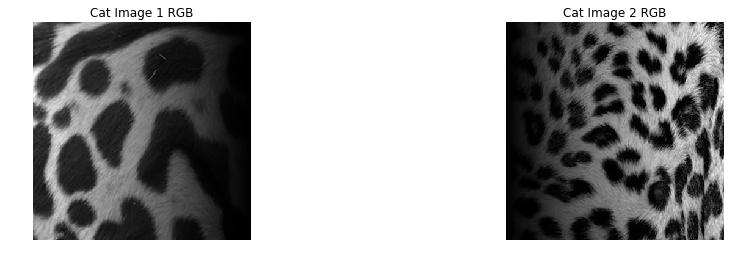

In [5]:
cat_fade_R2L = (cat_image_2_GRAYSCALE * right_to_left_array)
cat_fade_L2R = (cat_image_1_GRAYSCALE * left_to_right_array)
plt.figure(figsize=(24, 4))
plt.subplot(131); plt.imshow(cat_fade_L2R); plt.axis("off"); plt.title("Cat Image 1 RGB");
plt.subplot(132); plt.imshow(cat_fade_R2L); plt.axis("off"); plt.title("Cat Image 2 RGB");

Text(0.5, 1.0, 'Combined Image')

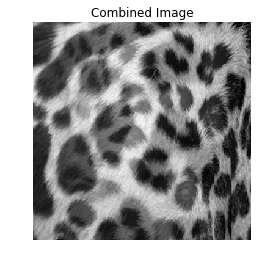

In [6]:
combined_image = cat_fade_L2R + cat_fade_R2L
plt.imshow(combined_image)
plt.axis("off")
plt.title("Combined Image")

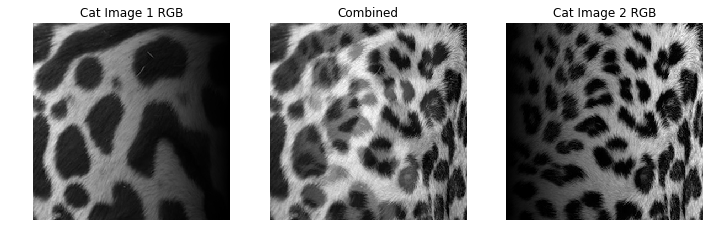

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(cat_fade_L2R); plt.axis("off"); plt.title("Cat Image 1 RGB");
plt.subplot(132); plt.imshow(combined_image); plt.axis("off"); plt.title("Combined");
plt.subplot(133); plt.imshow(cat_fade_R2L); plt.axis("off"); plt.title("Cat Image 2 RGB");

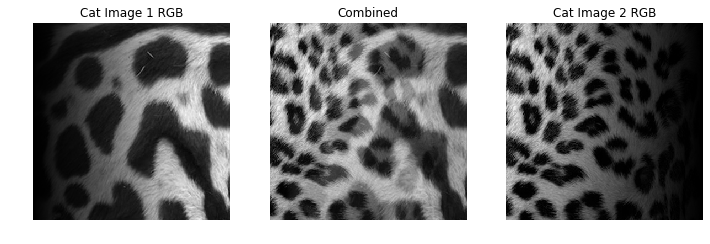

In [8]:
img_1_R2L = (cat_image_1_GRAYSCALE * right_to_left_array)
img_2_L2R = (cat_image_2_GRAYSCALE * left_to_right_array)
combined_image_swapped = img_1_R2L + img_2_L2R
plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(img_1_R2L); plt.axis("off"); plt.title("Cat Image 1 RGB");
plt.subplot(132); plt.imshow(combined_image_swapped); plt.axis("off"); plt.title("Combined");
plt.subplot(133); plt.imshow(img_2_L2R); plt.axis("off"); plt.title("Cat Image 2 RGB");

Cross Fading in middle Region

In [9]:
start = int((height / 2) - (height / 4))
end = int((height / 2) + (height / 4))

print(int(end-start))
middle_cf_L2R = np.linspace(1.0, 0, int(end-start))
middle_cf_R2L = np.linspace(0, 1.0, int(end-start))
cf_array_R2L = np.ones(shape=(height, width))
cf_array_L2R = np.ones(shape=(height, width))

cf_array_R2L[:, start:end] = middle_cf_R2L
cf_array_L2R[:, start:end] = middle_cf_L2R
# Set the appropriate areas to 0 or one
cf_array_R2L[:, 0:start] = 0
cf_array_L2R[:, end:] = 0

178


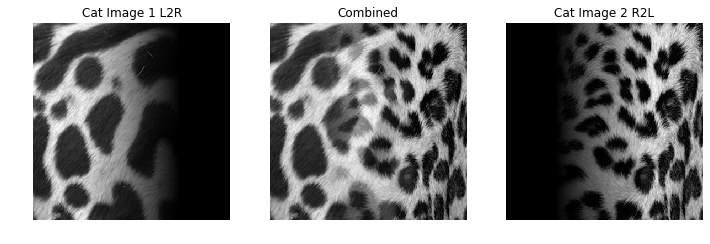

In [10]:
Middle_CF_Cat_1 = (cat_image_1_GRAYSCALE * cf_array_L2R)
Middle_CF_Cat_2 = (cat_image_2_GRAYSCALE * cf_array_R2L)
Middle_CF_combined_image_swapped = Middle_CF_Cat_1 + Middle_CF_Cat_2
plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(Middle_CF_Cat_1); plt.axis("off"); plt.title("Cat Image 1 L2R");
plt.subplot(132); plt.imshow(Middle_CF_combined_image_swapped); plt.axis("off"); plt.title("Combined");
plt.subplot(133); plt.imshow(Middle_CF_Cat_2); plt.axis("off"); plt.title("Cat Image 2 R2L");

True

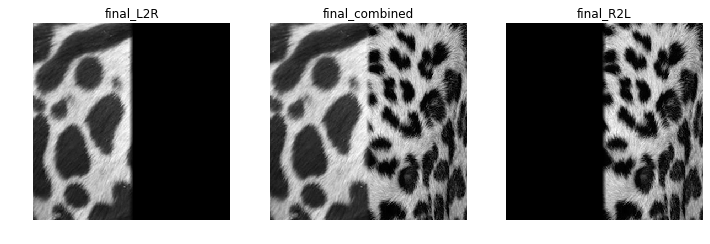

In [11]:
window_size = 10
Small_Window_CF_Start = int((height / 2) - (window_size / 2))
Small_Window_CF_End = int((height / 2) + (window_size / 2))

mask_L2R = np.linspace(1.0, 0, (Small_Window_CF_End - Small_Window_CF_Start))
mask_R2L = np.linspace(0, 1.0, (Small_Window_CF_End - Small_Window_CF_Start))

# Create Empty Arrays of ones

mask_array_R2L = np.ones(shape=(height, width))
mask_array_R2L[:, Small_Window_CF_Start:Small_Window_CF_End] = mask_R2L

mask_array_L2R = np.ones(shape=(height, width))
mask_array_L2R[:, Small_Window_CF_Start:Small_Window_CF_End] = mask_L2R

# Fill ones/zeros as needed

mask_array_R2L[:, 0:Small_Window_CF_Start] = 0
mask_array_L2R[:, Small_Window_CF_End:] = 0

final_L2R = (cat_image_1_GRAYSCALE * mask_array_L2R)
final_R2L = (cat_image_2_GRAYSCALE * mask_array_R2L)
final_combined = final_L2R + final_R2L
plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(final_L2R); plt.axis("off"); plt.title("final_L2R");
plt.subplot(132); plt.imshow(final_combined); plt.axis("off"); plt.title("final_combined");
plt.subplot(133); plt.imshow(final_R2L); plt.axis("off"); plt.title("final_R2L");

cv2.imwrite("L2R_WindowSize_{}.jpg".format(window_size), final_L2R)
cv2.imwrite("R2L_WindowSize_{}.jpg".format(window_size), final_R2L)
cv2.imwrite("Combined_WindowSize_{}.jpg".format(window_size), final_combined)

## Alternative Way to make the Mask (possibly faster/easier)

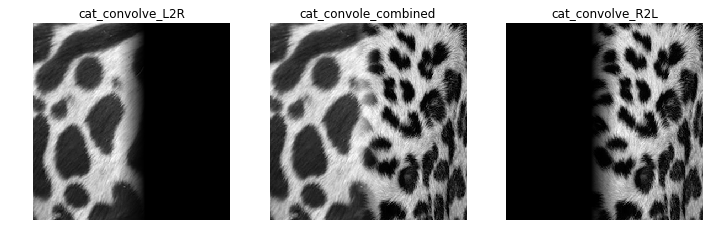

In [27]:
# Define Kernel Shape
kernal_size = 50

# Create masks of all ones
mask_L2R = np.ones(shape=(height, width))
mask_R2L = np.ones(shape=(height, width))

# Establish the point where the 1's change to 0
transition_point = int(width / 2)
mask_L2R[:, transition_point:] = 0
mask_R2L[:, :transition_point] = 0
box_kernel = np.ones((kernal_size,kernal_size), np.float32)/ (kernal_size**2)

# Convolve the box kernel over the masks
mask_convolve_L2R = cv2.filter2D(mask_L2R, -1, box_kernel)
mask_convolve_R2L = cv2.filter2D(mask_R2L, -1, box_kernel)

# Apply masks to images
cat_convolve_L2R = (cat_image_1_GRAYSCALE * mask_convolve_L2R)
cat_convolve_R2L = (cat_image_2_GRAYSCALE * mask_convolve_R2L)
cat_convole_combined = cat_convolve_L2R + cat_convolve_R2L

# Display Images
plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(cat_convolve_L2R); plt.axis("off"); plt.title("cat_convolve_L2R");
plt.subplot(132); plt.imshow(cat_convole_combined); plt.axis("off"); plt.title("cat_convole_combined");
plt.subplot(133); plt.imshow(cat_convolve_R2L); plt.axis("off"); plt.title("cat_convolve_R2L");

True

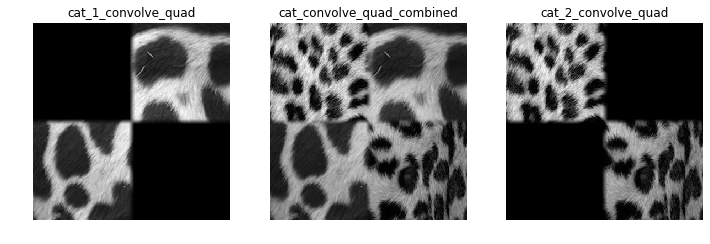

In [13]:
test_mask_1 = mask_L2R.copy()
test_mask_2 = mask_R2L.copy()

test_mask_1[:int(width/2),:] = np.fliplr(test_mask_1[:int(width/2), :])
test_mask_2[:int(width/2),:] = np.fliplr(test_mask_2[:int(width/2), :])


# Convolve the box kernel over the masks
test_mask_1_convolve = cv2.filter2D(test_mask_1, -1, box_kernel)
test_mask_2_convolve = cv2.filter2D(test_mask_2, -1, box_kernel)


# Create the quad filters
cat_1_convolve_quad = (cat_image_1_GRAYSCALE * test_mask_1_convolve)
cat_2_convolve_quad = (cat_image_2_GRAYSCALE * test_mask_2_convolve)
cat_convolve_quad_combined = cat_1_convolve_quad + cat_2_convolve_quad

# Display Images
plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(cat_1_convolve_quad); plt.axis("off"); plt.title("cat_1_convolve_quad");
plt.subplot(132); plt.imshow(cat_convolve_quad_combined); plt.axis("off"); plt.title("cat_convolve_quad_combined");
plt.subplot(133); plt.imshow(cat_2_convolve_quad); plt.axis("off"); plt.title("cat_2_convolve_quad");

cv2.imwrite("Quad_Fade_1_KernelSize_{}.jpg".format(kernal_size), cat_1_convolve_quad)
cv2.imwrite("Quad_Fade_2_KernelSize_{}.jpg".format(kernal_size), cat_2_convolve_quad)
cv2.imwrite("Combined_Quad_Fade_KernelSize_{}.jpg".format(kernal_size), cat_convolve_quad_combined)

uint8


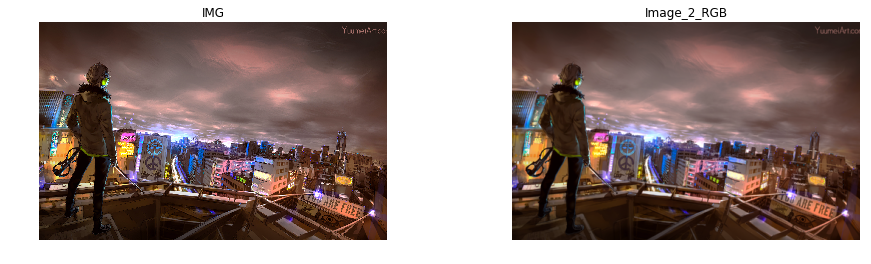

In [14]:
img = cv2.imread("cyber.jpg", cv2.IMREAD_COLOR)
img_2_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

horizontal_kernel = np.asarray([[-1, 1, -1],[-1, 1, -1],[-1, 1, -1]])
vertical_kernel = np.asarray([[-1, -1, -1],[1, 1, 1],[-1, -1, -1]])
h_convolve = cv2.filter2D(img, -1, horizontal_kernel)
v_convolve = cv2.filter2D(img, -1, box_kernel)
print(v_convolve.dtype)


# Display Images
plt.figure(figsize=(24, 4))
plt.subplot(131); plt.imshow(img); plt.axis("off"); plt.title("IMG");
plt.subplot(132); plt.imshow(v_convolve); plt.axis("off"); plt.title("Image_2_RGB");

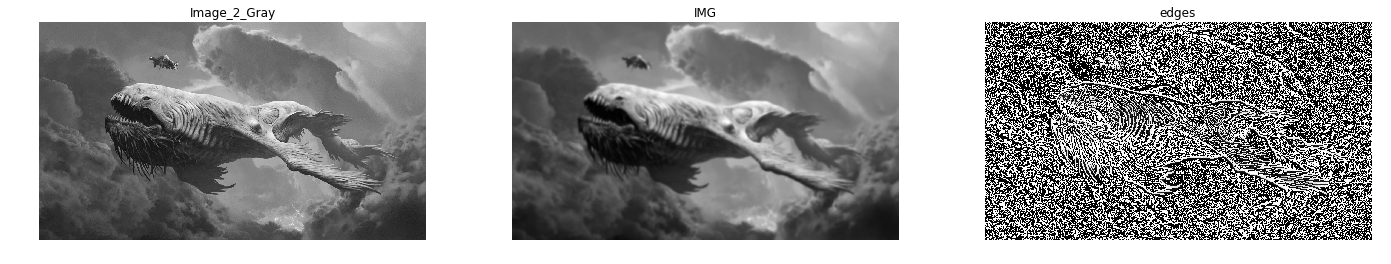

In [15]:
img = cv2.imread("monster.jpg", cv2.IMREAD_COLOR)
img_2_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_2_Gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.ones((5,5),np.float32)/25
test_img = cv2.filter2D(img_2_Gray, -1, kernel)
temp = cv2.GaussianBlur(img_2_Gray, (31,31), cv2.BORDER_REFLECT101)

edges = img_2_Gray - temp
# Display Images, 
plt.figure(figsize=(24, 4))
# plt.subplot(130); plt.imshow(img); plt.axis("off"); plt.title("IMG");
plt.subplot(131); plt.imshow(img_2_Gray); plt.axis("off"); plt.title("Image_2_Gray");
plt.subplot(132); plt.imshow(temp); plt.axis("off"); plt.title("IMG");
plt.subplot(133); plt.imshow(edges); plt.axis("off"); plt.title("edges");

True

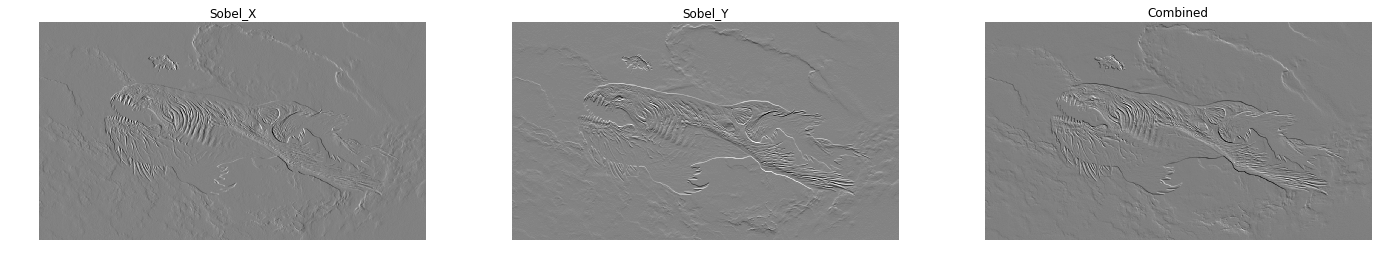

In [16]:
sobelx = cv2.Sobel(test_img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(test_img,cv2.CV_64F,0,1,ksize=3)
combined = sobelx - sobely

channels = blue, green, red = np.moveaxis(img, 2, 0)


plt.figure(figsize=(24, 4))
plt.subplot(131); plt.imshow(sobelx); plt.axis("off"); plt.title("Sobel_X");
plt.subplot(132); plt.imshow(sobely); plt.axis("off"); plt.title("Sobel_Y");
plt.subplot(133); plt.imshow(combined); plt.axis("off"); plt.title("Combined");
cv2.imwrite("Sobel_x.jpg", sobelx)
cv2.imwrite("Sobel_y.jpg", sobely)
cv2.imwrite("Combined.jpg", combined)


gauss_combined = cv2.GaussianBlur(combined, (3,3), cv2.BORDER_REFLECT101)
cv2.imwrite("Combined_Blur.jpg", gauss_combined)

lapl_img = cv2.Laplacian(combined,cv2.CV_64F)
cv2.imwrite("lapl_img.jpg", lapl_img)

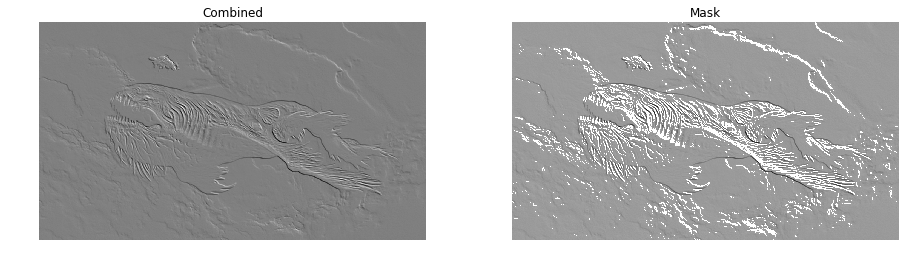

In [17]:
canny_edges = cv2.Canny(img_2_Gray,10,200)
new_mask = combined.copy()
# new_mask[new_mask < 200] = 0
new_mask[new_mask > 20] = 255
cv2.imwrite("NEW_MASK.jpg", new_mask)

plt.figure(figsize=(24, 4))
plt.subplot(131); plt.imshow(combined); plt.axis("off"); plt.title("Combined");
plt.subplot(132); plt.imshow(new_mask, cmap='gray'); plt.axis("off"); plt.title("Mask");

(1000, 1800)


True

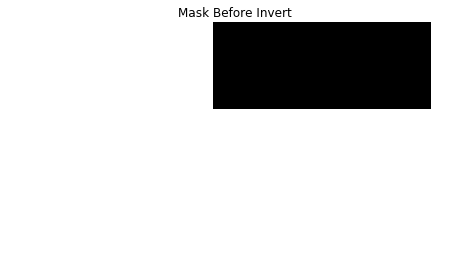

In [35]:
glen_img = np.zeros((1000,1800), dtype=np.uint8)

glen_img[:400:, 800::] = 255
glen_img = np.invert(glen_img)
print(mask.shape)
plt.figure(figsize=(24, 4))
plt.subplot(132); plt.imshow(glen_img); plt.axis("off"); plt.title("Mask Before Invert");
glen_img_after = cv2.filter2D(glen_img, -1, kernel=box_kernel)

cv2.imwrite("Me_Mask.jpg", glen_img_after)
